In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl

# 设置支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}  # 用来正常显示中文标签
# 设置学术化的图片风格
sns.set_style("whitegrid", rc=rc)  #设置绘图风格
sns.set_palette("hls")  #设置颜色主题
sns.set_context("paper")  #设置绘图元素缩放比例
data = pd.read_csv('data/data_raw.csv')
data['City'] = data['City'].astype(str)
data['Year'] = data['Year'].astype(str)

data.head()

,City,Year,STA,TIP,ECO,FDI,SDC
0,南京市,2006-12-31,65,2566,40645,151911,59.5
1,南京市,2007-12-31,51,3519,46306,196253,46.4
2,南京市,2008-12-31,188,4531,51454,237203,215.4
3,南京市,2009-12-31,89,6242,56035,239199,97.0
4,南京市,2010-12-31,141,8637,66132,281601,101.8


In [29]:
#描述性统计
data[['TIP', 'STA', 'ECO', 'FDI','SDC']].describe()

,TIP,STA,ECO,FDI,SDC
count,221.000000,221.000000,221.000000,221.000000,221.000000
mean,18938.615385,36.701357,79931.348416,213155.723982,37.550679
std,25843.327755,57.303192,43378.164660,180668.154773,51.511055
min,89.000000,0.000000,9790.000000,4858.000000,0.000000
25%,4092.000000,3.000000,45384.000000,93528.000000,5.100000
50%,10102.000000,12.000000,74908.000000,150731.000000,17.000000
75%,23828.000000,42.000000,110709.000000,281601.000000,46.400000
max,185160.000000,302.000000,197065.000000,916490.000000,275.600000


In [30]:
#相关性分析,pearson相关系数
corr=data[['TIP', 'STA', 'ECO', 'FDI','SDC']].corr(method='pearson')
corr

,TIP,STA,ECO,FDI,SDC
TIP,1.000000,0.718513,0.737851,0.693523,0.738795
STA,0.718513,1.000000,0.608822,0.603228,0.928993
ECO,0.737851,0.608822,1.000000,0.509902,0.574568
FDI,0.693523,0.603228,0.509902,1.000000,0.718090
SDC,0.738795,0.928993,0.574568,0.718090,1.000000


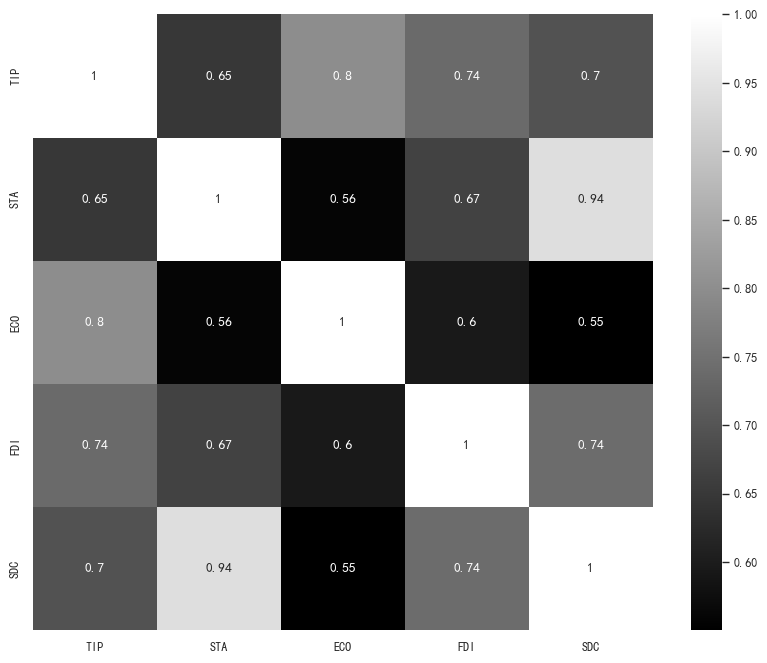

In [22]:
#绘制热力图,灰白色越深代表相关性越大
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='grey')
plt.show()


In [23]:
#pearson相关系数
#变量之间的相关性
data_col=data[['TIP', 'STA', 'ECO', 'FDI','SDC']]
from scipy.stats import pearsonr
for i in data_col.columns:
    for j in data_col.columns:
        if i != j:
            print(i, j, pearsonr(data[i], data[j]))
    


TIP STA PearsonRResult(statistic=0.6476710441269551, pvalue=1.1359330713213348e-27)
TIP ECO PearsonRResult(statistic=0.7981715957079959, pvalue=4.2421205703781666e-50)
TIP FDI PearsonRResult(statistic=0.7367187625771036, pvalue=4.452873212813683e-39)
TIP SDC PearsonRResult(statistic=0.695172495997832, pvalue=3.0896136723702074e-33)
STA TIP PearsonRResult(statistic=0.6476710441269551, pvalue=1.1359330713213348e-27)
STA ECO PearsonRResult(statistic=0.5607981248591226, pvalue=1.050576908684789e-19)
STA FDI PearsonRResult(statistic=0.6666180778655867, pvalue=9.08086652255826e-30)
STA SDC PearsonRResult(statistic=0.9405637956303639, pvalue=1.1073317818794606e-104)
ECO TIP PearsonRResult(statistic=0.7981715957079959, pvalue=4.2421205703781666e-50)
ECO STA PearsonRResult(statistic=0.5607981248591226, pvalue=1.050576908684789e-19)
ECO FDI PearsonRResult(statistic=0.5950011430517377, pvalue=1.4849416206212176e-22)
ECO SDC PearsonRResult(statistic=0.5502790372373549, pvalue=6.813652209632655e-19

In [24]:
import pandas as pd
from linearmodels.system import IV3SLS
from sklearn.metrics import r2_score
# 为每个方程指定公式
formulas = {
    'TIP': 'TIP ~ 1 + STA + ECO + FDI',
    'STA': 'STA ~ 1 + TIP + ECO + SDC'
}

# 将数据转换为长格式并添加固定效应
data_long = pd.get_dummies(data, columns=['City', 'Year'], drop_first=False)#将分类变量转换为哑变量

# 定义3SLS模型
mod = IV3SLS.from_formula(formulas, data_long)

# 拟合模型
res = mod.fit()

# 输出结果
print(res.summary)



                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.7514
No. Equations.:                     2   McElroy's R-squared:                 0.8509
No. Observations:                 221   Judge's (OLS) R-squared:             0.7514
Date:                Tue, Jul 09 2024   Berndt's R-squared:                  0.9534
Time:                        15:36:54   Dhrymes's R-squared:                 0.7514
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: TIP, Dependent Variable: TIP                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept  -1.346e+04     1313.6    -10.245     0.0000  -1.603e+04  -1.088e+04
STA         

In [25]:
# 提取拟合值
fitted_values = res.fitted_values

# 计算R²值
r2_tip = r2_score(data_long['TIP'], fitted_values['TIP'])
r2_sta = r2_score(data_long['STA'], fitted_values['STA'])

# 输出R²值
print(f'R² for TIP: {r2_tip:.3f}')
print(f'R² for STA: {r2_sta:.3f}')

R² for TIP: 0.751
R² for STA: 0.891
